In [44]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import random
import math
import matplotlib.pyplot as plt


In [29]:
def objective(x):
	return 0

# define range for input
bounds = np.array([[-5.0, 5.0]])
best = bounds[:,0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
best_eval = objective(best)

In [30]:
curr, curr_eval = best, best_eval

In [65]:
# basic framework for simulated annealing step
def SimulatedAnnealing(objective, bounds, n_iterations, step_size, temp):

    # generate initial point
    best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

    # evaluate initial point
    best_eval = objective(best)

    # current working solution
    curr, curr_eval = best, best_eval
    
    for i in range(n_iterations):
        
        # take a step
        candidate = curr + np.random.randn(len(bounds)) * step_size
    
        # evaluate step
        candidate_eval = objective(candidate)
    
        # check for new best solution
        if candidate_eval < curr_eval: # for minimization, use > for maximiation problem
            best, best_eval = candidate, candidate_eval
            #print('>%d f(%s) = %.5f' % (i, best, best_eval))
    
        # calculate difference in scores
        diff = candidate_eval-curr_eval
    
        # calculate temp for each epoch
        t = temp / float(i + 1)
    
        # calculate metropolis acceptance criterion
        metropolis = math.exp(-diff / t)
    
        # check whether we should keep new point
        if diff < 0 or np.random.rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval

    return [best, best_eval]

### Worked Example

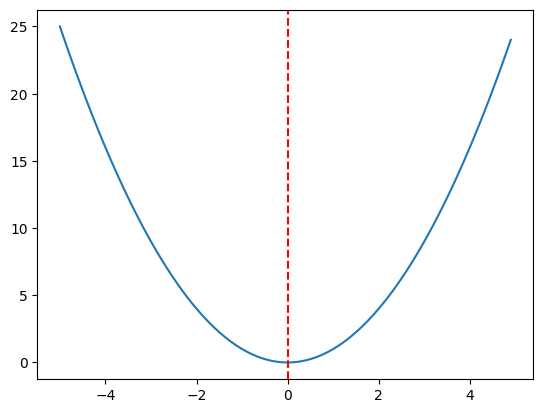

In [47]:
# Plot of objective funciton and its optimum
def objective(x):
    return x[0]**2.0

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
plt.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')
# show the plot
plt.show()

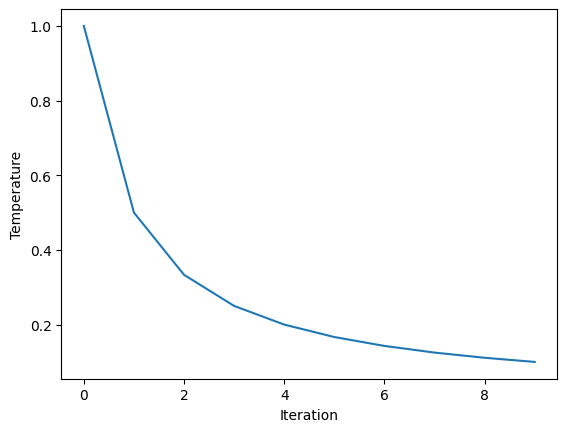

In [51]:
# Create plot showing relation between current temperature and number of iterations
# explore temperature vs algorithm iteration for simulated annealing
iterations = 10
initial_temp = 1

# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# plot iterations vs temperatures
plt.plot(iterations, temperatures)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()

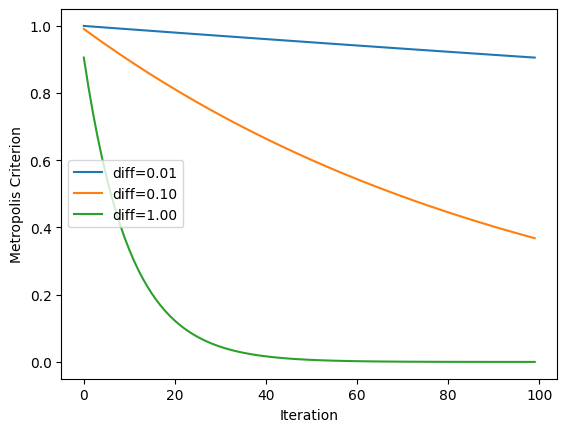

In [53]:
# Create plot showing relation between difference in solutions, metropolic criteria, iterations and temperature
iterations = 100
initial_temp = 10

# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# metropolis acceptance criterion
differences = [0.01, 0.1, 1.0]
for d in differences:
 metropolis = [math.exp(-d/t) for t in temperatures]
 # plot iterations vs metropolis
 label = 'diff=%.2f' % d
 plt.plot(iterations, metropolis, label=label)
# inalize plot
plt.xlabel('Iteration')
plt.ylabel('Metropolis Criterion')
plt.legend()
plt.show()

In [71]:
# Algorithm
random.seed(1)
n_iterations = 1000
temp = 10
step_size = 0.1
bounds = np.array([[-5.0, 5.0]])

best, score = SimulatedAnnealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

Done!
f([-0.07809128]) = 0.006098
